In [33]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=122848 sha256=c39c9e95a1753f82cea9d26db596204d810243b2424b36484842e226411be7b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2ccy6km/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos_nodes.sg",
                      path_links=path_directory + "erdos_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  4
Nb of segmented links :  4.0
Nb of event times :  8


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


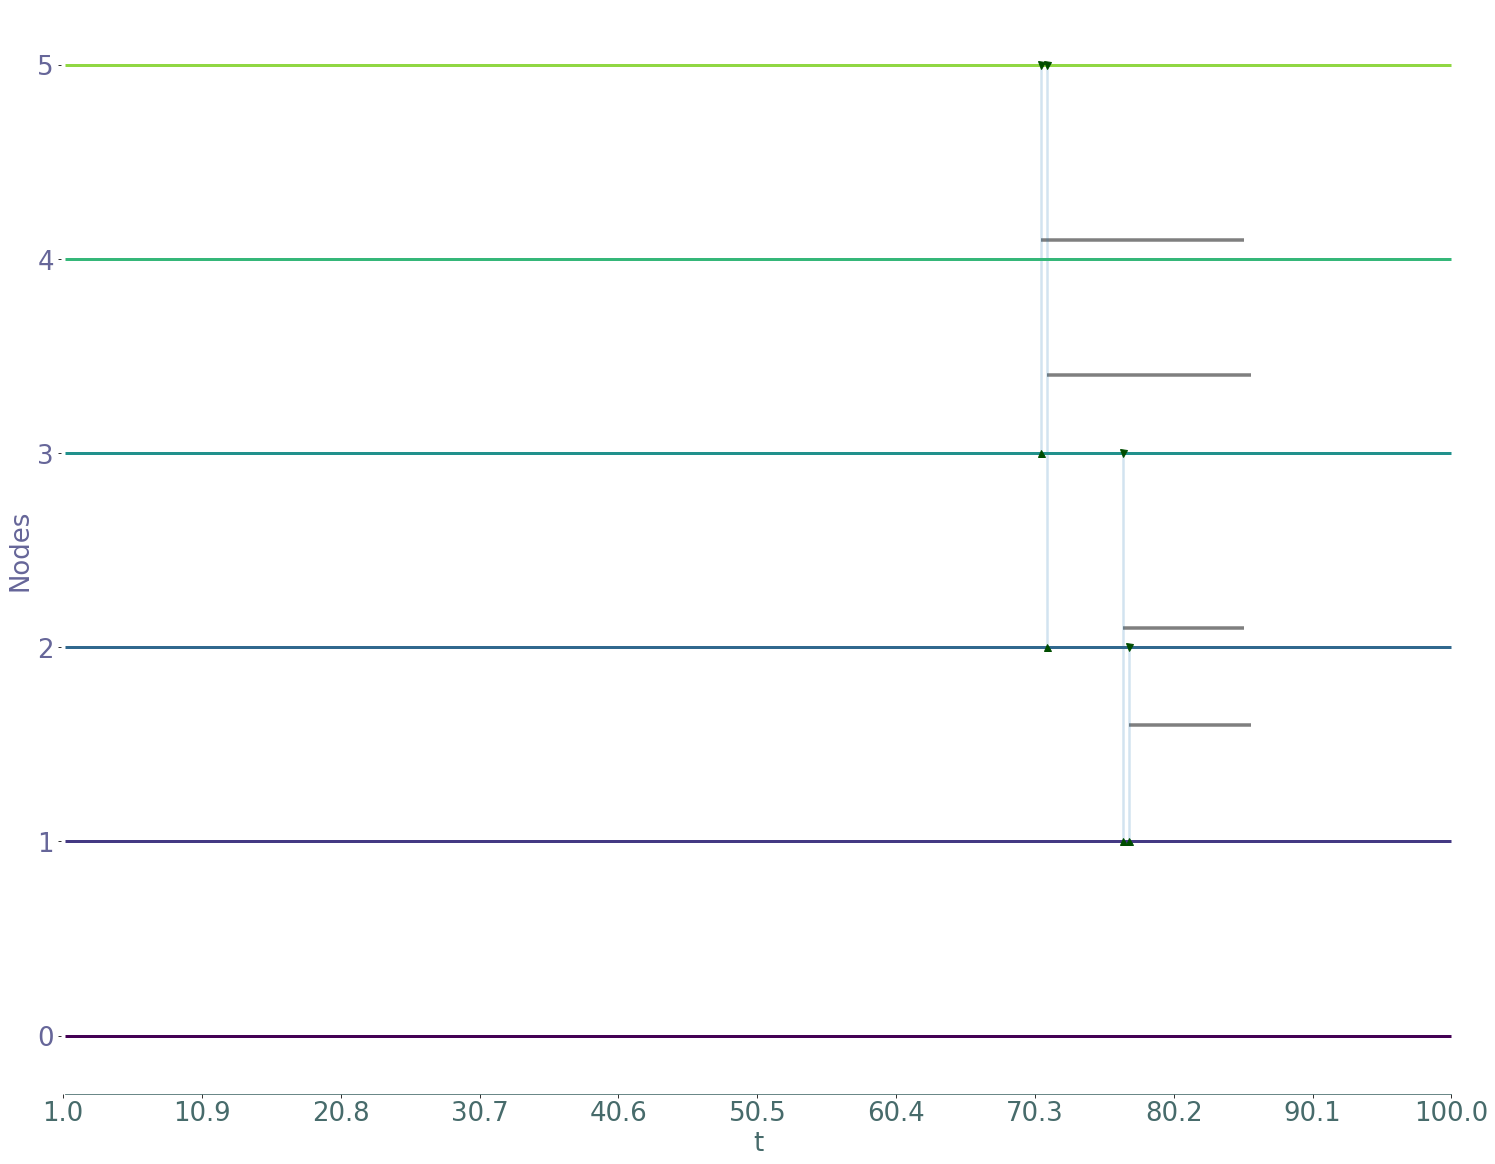

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [7]:
node = 1

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [9]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [10]:
lat_triplet[2]

[[76.58710978380334, 76.58710978380334, 3],
 [76.99483540499104, 76.99483540499104, 1],
 [85.20753633756169, 85.20753633756169, 1],
 [85.70629317822616, 85.70629317822616, 1]]

In [11]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [12]:
G.graph[(1, 76.58710978380334)]

AtlasView({(3, 76.58710978380334): {'interval': (76.58710978380334, 76.58710978380334)}})

In [13]:
cur_best[2]

{1.1308940848602123: (-inf, inf),
 70.75854692767031: (-inf, inf),
 71.12462021087455: (-inf, inf),
 76.58710978380334: (76.58710978380334, 3),
 76.99483540499104: (76.99483540499104, 1),
 85.20753633756169: (85.20753633756169, 1),
 85.70629317822616: (85.70629317822616, 1),
 100.0: (-inf, inf)}

In [14]:
edge = bt.edges(nouveau)
edge

{0: {},
 1: {2: {76.99483540499104: (76.99483540499104, 76.99483540499104),
   85.20753633756169: (76.99483540499104, 85.20753633756169),
   85.70629317822616: (85.20753633756169, 85.70629317822616)},
  3: {76.58710978380334: (76.58710978380334, 76.58710978380334),
   76.99483540499104: (76.58710978380334, 76.99483540499104),
   85.20753633756169: (76.99483540499104, 85.20753633756169)}},
 2: {},
 3: {5: {70.75854692767031: (70.75854692767031, 70.75854692767031),
   71.12462021087455: (70.75854692767031, 71.12462021087455),
   76.58710978380334: (71.12462021087455, 76.58710978380334),
   76.99483540499104: (76.58710978380334, 76.99483540499104),
   85.20753633756169: (76.99483540499104, 85.20753633756169)}},
 4: {},
 5: {2: {71.12462021087455: (71.12462021087455, 71.12462021087455),
   76.58710978380334: (71.12462021087455, 76.58710978380334),
   76.99483540499104: (76.58710978380334, 76.99483540499104),
   85.20753633756169: (76.99483540499104, 85.20753633756169),
   85.70629317822616

In [15]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

2


In [16]:
G.sources()

[(1, 76.99483540499104),
 (1, 85.20753633756169),
 (1, 85.70629317822616),
 (1, 76.58710978380334)]

In [17]:
G.graph[(1, 76.99483540499104)]

AtlasView({(2, 76.99483540499104): {'interval': (76.99483540499104, 76.99483540499104)}, (3, 76.99483540499104): {'interval': (76.58710978380334, 76.99483540499104)}})

In [18]:
G.graph[(3, 76.58710978380334)]

AtlasView({(5, 76.58710978380334): {'interval': (71.12462021087455, 76.58710978380334)}})

In [19]:
after[2]

{1.1308940848602123: False,
 70.75854692767031: False,
 71.12462021087455: False,
 76.58710978380334: True,
 76.99483540499104: True,
 85.20753633756169: True,
 85.70629317822616: False,
 100.0: False}

In [20]:
before[2]

{1.1308940848602123: False,
 70.75854692767031: False,
 71.12462021087455: False,
 76.58710978380334: False,
 76.99483540499104: True,
 85.20753633756169: True,
 85.70629317822616: True,
 100.0: False}

In [21]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [22]:
sigma_r

{(0, 1.1308940848602123): vol(0,0),
 (0, 70.75854692767031): vol(0,0),
 (0, 71.12462021087455): vol(0,0),
 (0, 76.58710978380334): vol(0,0),
 (0, 76.99483540499104): vol(0,0),
 (0, 85.20753633756169): vol(0,0),
 (0, 85.70629317822616): vol(0,0),
 (0, 100.0): vol(0,0),
 (1, 1.1308940848602123): vol(1,0),
 (1, 70.75854692767031): vol(1,0),
 (1, 71.12462021087455): vol(1,0),
 (1, 76.58710978380334): vol(1,0),
 (1, 76.99483540499104): vol(1,0),
 (1, 85.20753633756169): vol(1,0),
 (1, 85.70629317822616): vol(1,0),
 (1, 100.0): vol(1,0),
 (2, 1.1308940848602123): vol(0,0),
 (2, 70.75854692767031): vol(0,0),
 (2, 71.12462021087455): vol(0,0),
 (2, 76.58710978380334): vol(1,0),
 (2, 76.99483540499104): vol(1,0),
 (2, 85.20753633756169): vol(1,0),
 (2, 85.70629317822616): vol(1,0),
 (2, 100.0): vol(1,0),
 (3, 1.1308940848602123): vol(0,0),
 (3, 70.75854692767031): vol(0,0),
 (3, 71.12462021087455): vol(0,0),
 (3, 76.58710978380334): vol(1,0),
 (3, 76.99483540499104): vol(1,0),
 (3, 85.207536337

In [23]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [24]:
prev_next

[{},
 {76.58710978380334: [76.99483540499104, 85.20753633756169, 85.70629317822616],
  76.99483540499104: [76.58710978380334, 85.20753633756169, 85.70629317822616],
  85.20753633756169: [76.99483540499104, 76.58710978380334, 85.70629317822616],
  85.70629317822616: [85.20753633756169,
   76.99483540499104,
   76.58710978380334]},
 {},
 {},
 {},
 {}]

In [25]:
contri[2]

{76.58710978380334: (1.1308940848602123, 76.58710978380334),
 76.99483540499104: (76.99483540499104, 76.99483540499104),
 85.20753633756169: (85.20753633756169, 85.20753633756169),
 85.70629317822616: (85.70629317822616, 100.0)}

In [26]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [27]:
deltasvvt

{(5, 76.58710978380334): vol(0,0),
 (2, 76.58710978380334): vol(0,0),
 (1, 76.99483540499104): vol(0,0),
 (2, 76.99483540499104): vol(0,0),
 (1, 85.20753633756169): vol(0,0),
 (2, 85.20753633756169): vol(0,0),
 (1, 85.70629317822616): vol(0,0),
 (2, 85.70629317822616): vol(0,0),
 (1, 76.58710978380334): vol(0,0),
 (3, 76.58710978380334): vol(0,0),
 (3, 76.99483540499104): vol(0,0),
 (3, 85.20753633756169): vol(0,0),
 (5, 76.99483540499104): vol(0,0),
 (5, 85.20753633756169): vol(0,0)}

In [28]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

In [29]:
contribution

{2: {76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  76.58710978380334: vol(0,0),
  1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  100.0: vol(0,0)},
 5: {76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  76.58710978380334: vol(0,0),
  1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 3: {76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  76.58710978380334: vol(0,0),
  1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  85.70629317822616: vol(0,0),
  100.0: vol(0,0)},
 1: {76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  76.58710978380334: vol(0,0),
  1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  100.0: vol(0,0)},
 0: {1.1308940848602123: vol(0,0),
 

In [30]:
contribution[2]

{76.99483540499104: vol(0,0),
 85.20753633756169: vol(0,0),
 85.70629317822616: vol(0,0),
 76.58710978380334: vol(0,0),
 1.1308940848602123: vol(0,0),
 70.75854692767031: vol(0,0),
 71.12462021087455: vol(0,0),
 100.0: vol(0,0)}